<a href="https://colab.research.google.com/github/NayibGS07/Diplomado_Ciencia_de_Datos/blob/main/Diplomado_Ciencia_de_Datos_2024/Ciencia_de_Datos_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIPLOMADO CIENCIA MATEMÁTICA DE DATOS

## MODULO: SENTIMENT ANALYSIS

## Libraries

In [1]:
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [3]:
from nltk.corpus import movie_reviews
import random
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import random, re, string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

## Sentiment Analysis with Naive Bayes

In [4]:
# Load and prepare the dataset
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

In [5]:
# Define the feature extractor
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features


In [6]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[:1600], featuresets[1600:]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [7]:
# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))

0.8025


In [8]:
# Show the most important features as interpreted by Naive Bayes
classifier.show_most_informative_features(5)

Most Informative Features
   contains(outstanding) = True              pos : neg    =      9.2 : 1.0
        contains(seagal) = True              neg : pos    =      7.3 : 1.0
         contains(mulan) = True              pos : neg    =      6.7 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.7 : 1.0
          contains(jedi) = True              pos : neg    =      6.4 : 1.0


## VADER MODEL

In [9]:
# Create an instance of the Vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
# List of example texts to analyze
texts = [
    "I love this product! It works great and is very affordable.",
    "This product is okay. It gets the job done, but could be better.",
    "I hate this product. It doesn't work at all and is a waste of money."
]

In [11]:
# Loop through the texts and get the sentiment scores for each one
for text in texts:
    scores = analyzer.polarity_scores(text)
    print(text)
    print(scores)

I love this product! It works great and is very affordable.
{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8622}
This product is okay. It gets the job done, but could be better.
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.6486}
I hate this product. It doesn't work at all and is a waste of money.
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7579}


### Real Use Case

#### Load Data

In [12]:
df_1 = pd.read_csv('/content/reviews_1.csv')
df_2 = pd.read_csv('/content/reviews_2.csv')

df = pd.concat([df_1, df_2], ignore_index = True)
df.head()

,id,text,label
0,0,We started giving this to my 5 year old Labrad...,dogs
1,1,This product is easy to set up and use. I have...,dogs
2,2,my dog has nerves and wants to itch and chew.....,dogs
3,3,the breeded gave us a can of Nupro when we too...,dogs
4,4,"Very study, well made poop bag. Easy to open a...",dogs


#### Data Exploration

In [13]:
df_freq = pd.DataFrame(df['label'].value_counts()).reset_index()
df_freq.columns = ['label', 'freq']

fig = px.bar(df_freq, x = "label", y = "freq", color = "label", text = "freq", title = "Pets Reviews", template = 'plotly_white')
fig.show()

In [14]:
word_tokenize('Hello world! I love this class')

['Hello', 'world', '!', 'I', 'love', 'this', 'class']

In [15]:
sent_tokenize('Hello world! I love this class')

['Hello world!', 'I love this class']

In [16]:
comments = []
for comment in df["text"]:
    comments.append(list(word_tokenize(str(comment).lower())))
comments[0]

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it']

In [17]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [18]:
all_words = list(get_all_words(list(comments)))


In [19]:
WF = nltk.FreqDist(all_words)
WFdf = pd.DataFrame(WF.most_common(30))
WFdf.columns = ['Word', "Frequency"]
fig = px.bar(WFdf, x = "Frequency", y = "Word", orientation='h', text = "Frequency", width=1000, height=750, template = 'plotly_white',
             title = 'Word Count - 1')
fig.show()

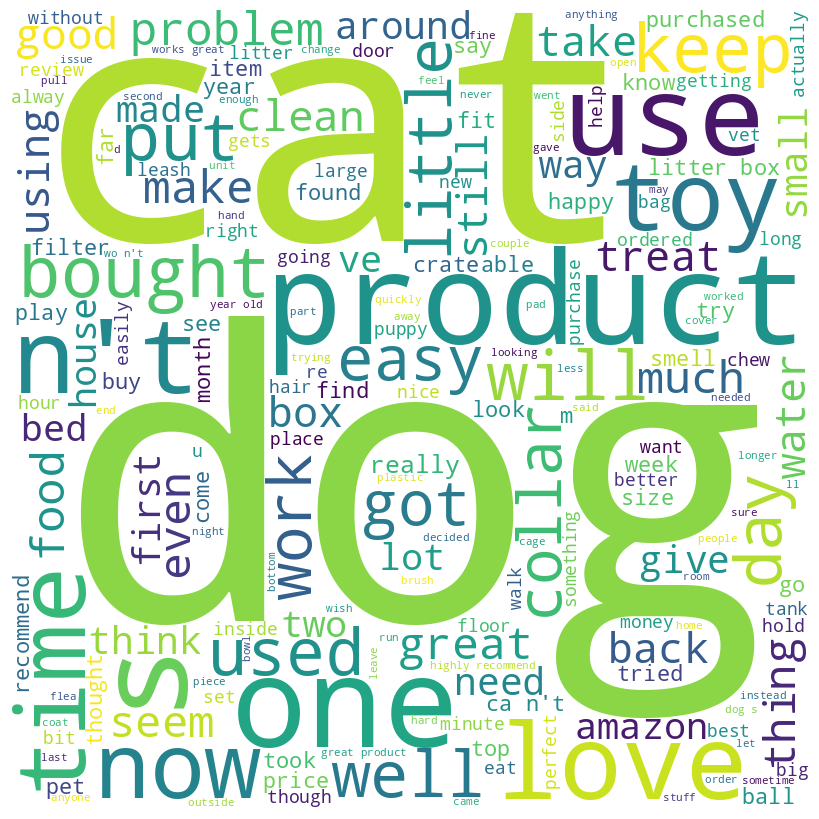

In [20]:
comment_words = ''
comment_words += " ".join(all_words)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [21]:
def remove_noise(comment, stop_words = ()):
    lemmatizer = WordNetLemmatizer()
    cleaned_tokens = []
    for token, tag in pos_tag(comment):
        token = re.sub(r'\W', ' ', token)
        token = re.sub(r'\s+[a-zA-Z]\s+', ' ', token)
        token = re.sub(r'\^[a-zA-Z]\s+', ' ', token)
        token = re.sub(r'\s+', ' ', token, flags=re.I)
        token = re.sub(r'^b\s+', '', token)
        token = re.sub(' +', ' ', token)
        if token == 'n t':
          token = 'not'
        if token == ' s':
          token = 'is'
        if token == 've':
          token = 'have'
        if token == 'ca':
          token = 'can'
        if token == 'wo':
          token = 'will'
        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        token = lemmatizer.lemmatize(token, pos = pos)
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [22]:
stop_words = set(stopwords.words('english'))
stop_words.update([' '])

In [23]:
comments = []
for comment in df["text"]:
    comments.append(word_tokenize(str(comment).lower()))
comments[0]

['we',
 'started',
 'giving',
 'this',
 'to',
 'my',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 '(',
 'female',
 ')',
 'she',
 'has',
 'arthritis',
 'problems',
 'along',
 'with',
 'weakness',
 'in',
 'her',
 'back',
 'legs',
 'and',
 'it',
 'seems',
 'to',
 'help',
 'a',
 'little',
 'bit',
 ',',
 'would',
 'not',
 'hurt',
 'to',
 'try',
 'it']

In [24]:
clean_comments = []
for comment in comments:
    clean_comments.append(remove_noise(comment, stop_words))
clean_comments[0]

['start',
 'give',
 '5',
 'year',
 'old',
 'labrador',
 'retriever',
 'female',
 'arthritis',
 'problem',
 'along',
 'weakness',
 'back',
 'leg',
 'seem',
 'help',
 'little',
 'bit',
 'would',
 'hurt',
 'try']

In [25]:
all_words = list(get_all_words(list(clean_comments)))

In [26]:
WF = nltk.FreqDist(all_words)
WFdf = pd.DataFrame(WF.most_common(30))
WFdf.columns = ['Word', "Frequency"]
fig = px.bar(WFdf, x = "Frequency", y = "Word", orientation='h', text = "Frequency", width=1000, height=750, template = 'plotly_white',
             title = 'Word Count - 1')
fig.show()

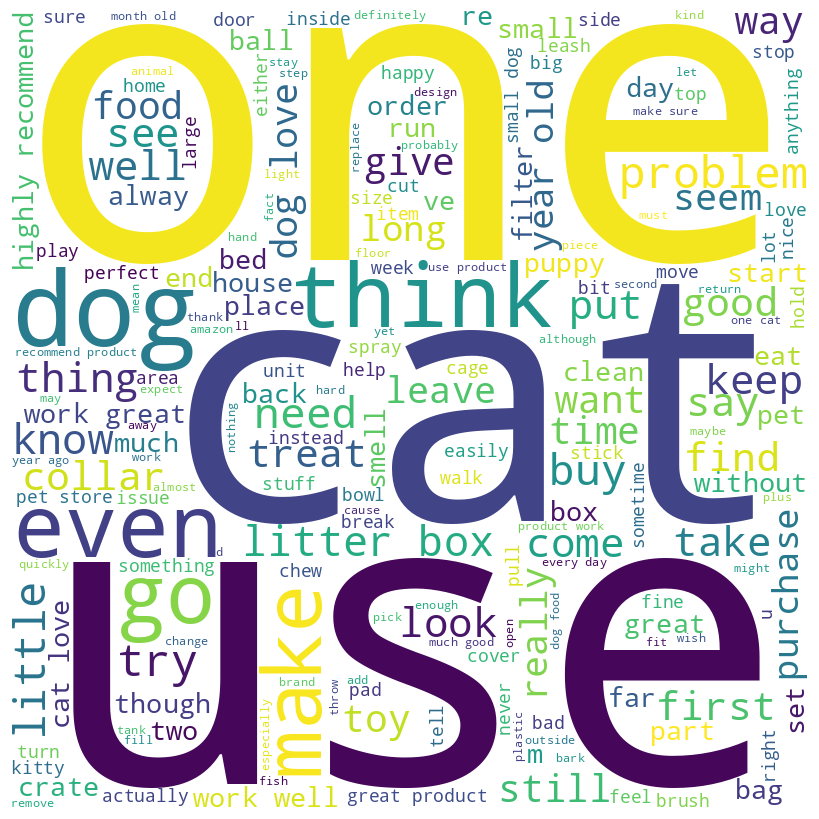

In [27]:
comment_words = ''
comment_words += " ".join(all_words)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [28]:
text = nltk.Text(all_words)
finder = nltk.collocations.BigramCollocationFinder.from_words(text)
df_2 = pd.DataFrame.from_dict(finder.ngram_fd.most_common(30))
df_2.columns = ["Words", "Frequency"]
comments = []
for l in df_2["Words"]:
    comments.append(" ".join(l))
df_2["Words"] = pd.Series(comments)
fig = px.bar(df_2, x = "Frequency", y = "Words", orientation='h', text = "Frequency", width=1000, height=750)
fig.show()

In [29]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(text)
df_3 = pd.DataFrame.from_dict(finder.ngram_fd.most_common(30))
df_3.columns = ["Words", "Frequency"]
comments = []
for l in df_3["Words"]:
    comments.append(" ".join(l))
df_3["Words"] = pd.Series(comments)
fig = px.bar(df_3, x = "Frequency", y = "Words", orientation='h', text = "Frequency", width=1000, height=750)
fig.show()

In [30]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words(text)
df_4 = pd.DataFrame.from_dict(finder.ngram_fd.most_common(30))
df_4.columns = ["Words", "Frequency"]
comments = []
for l in df_4["Words"]:
    comments.append(" ".join(l))
df_4["Words"] = pd.Series(comments)
fig = px.bar(df_4, x = "Frequency", y = "Words", orientation='h', text = "Frequency", width=1000, height=750)
fig.show()

#### Sentiment Analysis

In [31]:
analyzer = SentimentIntensityAnalyzer()
score_list = list()

for comment in df['text']:
  score = analyzer.polarity_scores(comment)
  score_list.append(score['compound'])

df['SS'] = pd.Series(score_list)
df.loc[df.SS >= 0.1, 'Sentiment'] = 'Positive'
df.loc[(df.SS < 0.1) & (df.SS > -0.1), 'Sentiment'] = 'Neutral'
df.loc[df.SS <= -0.1, 'Sentiment'] = 'Negative'
df

,id,text,label,SS,Sentiment
0,0,We started giving this to my 5 year old Labrad...,dogs,0.3348,Positive
1,1,This product is easy to set up and use. I have...,dogs,0.9059,Positive
2,2,my dog has nerves and wants to itch and chew.....,dogs,-0.8176,Negative
3,3,the breeded gave us a can of Nupro when we too...,dogs,0.9184,Positive
4,4,"Very study, well made poop bag. Easy to open a...",dogs,-0.1182,Negative
...,...,...,...,...,...
69405,52052,Sadly I have tried every medicine suggested in...,dogs,0.0516,Neutral
69406,52053,I have a dalmation that likes to jump a 5 foot...,dogs,-0.5770,Negative
69407,52054,"My cats ADORE this toy, and even play with eac...",cats,0.7555,Positive
69408,52055,The seat is good. It was used and there was su...,dogs,0.8843,Positive


In [32]:
df_sentiment = df.Sentiment.value_counts().reset_index()
df_sentiment.columns = ['Sentiment', 'Count']
fig = px.pie(df_sentiment, values = 'Count', names = 'Sentiment', title = 'Sentiment Percentage')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(showlegend = False)
fig.show()

In [33]:
for index, row in df[df.Sentiment == 'Positive'].sort_values(['SS'], ascending = False).head().iterrows():
  print(row.text, row.SS)

My little best friend is almost 15. As a kitten, she swallowed magnets (playing with those darn pics we all post on our fridge. Tell all you know - don't do that! Use a photo album or tape instead!) Ever since her little lifesaving surgery, she can only eat certain kibble and only 10 or so of them at a time, and each feeding spaced well enough apart. Any more, and she'll get sick.Needless to say, she is always begging. She just doesn't understand her situation until it's too late. And then, well - it's too late for my carpet. Not to mention that she doesn't feel well afterwards.She has been healthy as a horse otherwise until a scare a few months back. At the vet visit, she weighed in at a mere 5.5 lbs (runt of the litter, asian persuasion --not starvation by me). While she was deemed utterly healthy (and sweet :) by the vet (albeit, diagnosed with severe hip dysplasia --the probable reason for her 'unwellness moment' (see my Excel Glucosamine Cat Paste review)), I felt as though we cou

In [34]:
for index, row in df[df.Sentiment == 'Neutral'].sort_values(['SS'], ascending = False).head().iterrows():
  print(row.text, row.SS)

We ended up returning this product. It's very hard to use, the food compartments might be too small for your pet (they really are not that big and we tried to feed a tiny Chihuahua). The device is round so you need to make sure your pet can access it from all angles meaning you probably can not put it next to a wall, having your pet food dish in the middle of the room is not something we liked to do.The worst thing is that taking off the feeder in order to clean and refill the food compartments is just very hard, you need to simply apply a lot of force to release it and then putting it back is also very hard, it must be at a specific angle for some plastic clips on the bottom (which you can not see) and then you must apply lots of force to push it in. I would expect some smarter way that is easy to use for humans and not so much for pets.Returned this product. 0.0999
I was very excited about Andis new CeramicEdge blade but I must say I thought it was terrible!I oiled it/sprayed it/did 

In [35]:
for index, row in df[df.Sentiment == 'Negative'].sort_values(['SS'], ascending = True).head().iterrows():
  print(row.text, row.SS)

UPDATE - This Product IS NOT WORTH 4 STARS simply because it is automatic. I couldn't keep it in the bedroom because it is a motor after all and is by no means whisper quiet! The noise is enough to wake the dead. I could hear it from the living room.It takes 20 minutes to cycle after Kitty leaves the box. Sitting undisturbed is my "guesstimation" on why the pee eventually sinks into the ENTIRE Slightly Plastic Covered CARDBOARD CARTRIDGE. It will need to be replaced WAAAAY before 2 weeks... at about $20 a cartridge (including S&H;) you better have a bottomless bank account.I suggest using a thick piece of Plastic Carpet Protector under the entire unit. You will need it! You can get it by the roll at Home Depot.The Cartridges Are OBSCENELY EXPENSIVE considering the use you get out of them.if you expect it to last EVEN TWO WEEKS, you need to remove the Poo EVERY FEW DAYS from the end of the cartridge, by hand - a pooper scooper really doesn't fit in the tiny covered area. It is not that 

In [36]:
df.groupby(['label', 'Sentiment']).agg({'Sentiment':['count'], 'SS':['mean', 'min', 'max']})

Sentiment        SS                
                                   count      mean     min     max
label                Sentiment                                    
birds                Negative        172 -0.543503 -0.9773 -0.1010
                     Neutral          72  0.007715 -0.0936  0.0989
                     Positive       1167  0.779326  0.1007  0.9994
bunny rabbit central Negative        108 -0.570249 -0.9809 -0.1184
                     Neutral          33 -0.000867 -0.0772  0.0890
                     Positive        619  0.783769  0.1027  0.9962
cats                 Negative       3809 -0.546904 -0.9965 -0.1001
                     Neutral        1169  0.001689 -0.0992  0.0999
                     Positive      19683  0.768556  0.1002  0.9998
dogs                 Negative       5480 -0.535779 -0.9952 -0.1007
                     Neutral        1886  0.002971 -0.0992  0.0998
                     Positive      29967  0.766416  0.1001  0.9993
fish aquatic pets    Negative        766 -0.536746 -0.9913 -0.1007
                     Neutral         292  0.002983 -0.0983  0.0996
                     Positive       3731  0.736113  0.1002  0.9981
small animals        Negative         59 -0.547022 -0.9656 -0.1154
                     Neutral          13 -0.001515 -0.0885  0.0516
                     Positive        384  0.758768  0.1107  0.9975

In [37]:
df_sen = (df.groupby(['label']).Sentiment.value_counts(normalize = True)*100).reset_index()
df_sen.columns = ['Pet', 'Sentiment', 'Percentage']
fig = px.bar(df_sen, x = 'Pet', y = 'Percentage', color = 'Sentiment', title = 'Sentiment by Pet',
             text = df_sen['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),
             color_discrete_map = {'Positive':'#00CC96', 'Neutral':'#636EFA', 'Negative':'#EF553B'}, template = 'plotly_white')
fig.show()